LOADING THE DATASET


In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("Linear Regression Train.csv")


In [2]:
X = df.drop("target", axis=1).values
y = df["target"].values.reshape(-1,1)

from scaling import StandardScaler

# feature scaling
sc = StandardScaler()
X = sc.fit_transform(X)
# adding bias term
X = np.hstack([np.ones((X.shape[0], 1)), X])

from train_test_split import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

Epoch 0 | Loss = 5670.21643
Epoch 100 | Loss = 693.24046
Epoch 200 | Loss = 225.41946
Epoch 300 | Loss = 155.33447
Epoch 400 | Loss = 140.33305
Epoch 500 | Loss = 133.91448
Epoch 600 | Loss = 129.34681
Epoch 700 | Loss = 125.47385
Epoch 800 | Loss = 122.00213
Epoch 900 | Loss = 118.81329
Epoch 1000 | Loss = 115.84467
Epoch 1100 | Loss = 113.05898
Epoch 1200 | Loss = 110.43247
Epoch 1300 | Loss = 107.94896
Epoch 1400 | Loss = 105.59667
Epoch 1499 | Loss = 103.38812


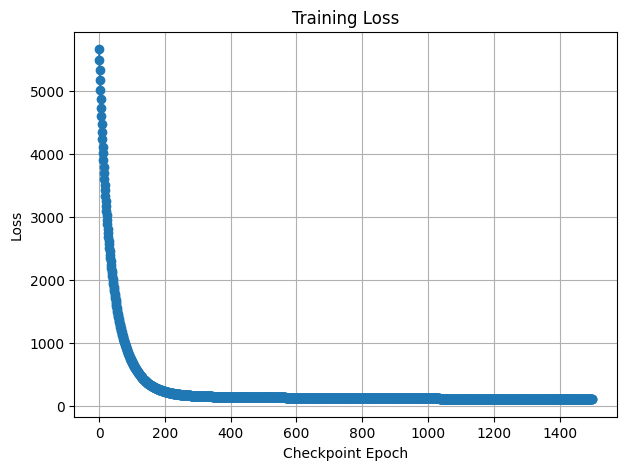

In [6]:
from linear_regression import LinearRegression

model = LinearRegression(lr=0.01, epochs=1500)
model.fit(X_train, y_train,store_every=100,verbose=True)

y_pred = model.predict(X_test)

model.plot_loss_curve("Training Loss")


In [7]:
from metrics import mse, rmse, r2_score

train_mse = mse(y_test, y_pred)
train_rmse = rmse(y_test, y_pred)
train_r2 = r2_score(y_test, y_pred)

print("MSE:", train_mse)
print("RMSE:", train_rmse)
print("R2 Score:", train_r2)


MSE: 206.4866385692921
RMSE: 14.369642952046236
R2 Score: 0.9468065517785789


In [5]:
test_size=int(0.2*len(X))
test_idx=np.arange(len(X)-test_size,len(X))

from bias_variance import bias_variance_decomposition
bias2, var = bias_variance_decomposition(
    model_class=LinearRegression,
    X=X,
    y=y,
    test_idx=test_idx,
    n_repeats=20,          # more repetitions → smoother estimate
    sample_ratio=0.8,
    lr=0.01,
    epochs=1000,
    lambda_reg=0.0
)
print(bias2)
print(var)

227.63150200742044
0.006685922469149924


In [8]:
test_df = pd.read_csv("Linear Regression Test.csv")

X_test = test_df.values.astype(float)
ones = np.ones((X_test.shape[0], 1))
X_test = np.hstack((ones, X_test))

from scaling import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)        # fitted on training only
X_test = scaler.transform(X_test)
y_test_pred = model.predict(X_test)
y_test_pred = y_test_pred.flatten()
submission = pd.DataFrame(y_test_pred, columns=["target"])
submission.to_csv("linear_regression_predictions.csv", index=False)



